<a href="https://colab.research.google.com/github/shashankbhandary123/Advance-Java-Programs/blob/main/Electricity%20Load%20Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Colab cache for faster access to the 'electric-power-consumption-data-set' dataset.
Dataset downloaded to: /kaggle/input/electric-power-consumption-data-set

Loaded dataset sample:
         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4        

/tmp/ipython-input-3057999036.py:35: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'] + " " + df['Time'], errors='coerce')
/tmp/ipython-input-3057999036.py:44: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').mean().dropna()
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           792 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,144 (20.09 KB)

 Trainable params: 5,144 (20.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0208
Epoch 2/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0160
Epoch 3/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0152
Epoch 4/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0151
Epoch 5/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0149
Epoch 6/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0148
Epoch 7/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0147
Epoch 8/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0145
Epoch 9/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0144
Epoch 10/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0146
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step

===================== 24-HOUR FORECAST =====================
    Hour  Actual Load  Predicted Load  Difference (Actual - Pred)
0      1     1.342933        1.226478                    0.116455
1      2     1.247567        0.804547                    0.443020
2      3     0.957000        

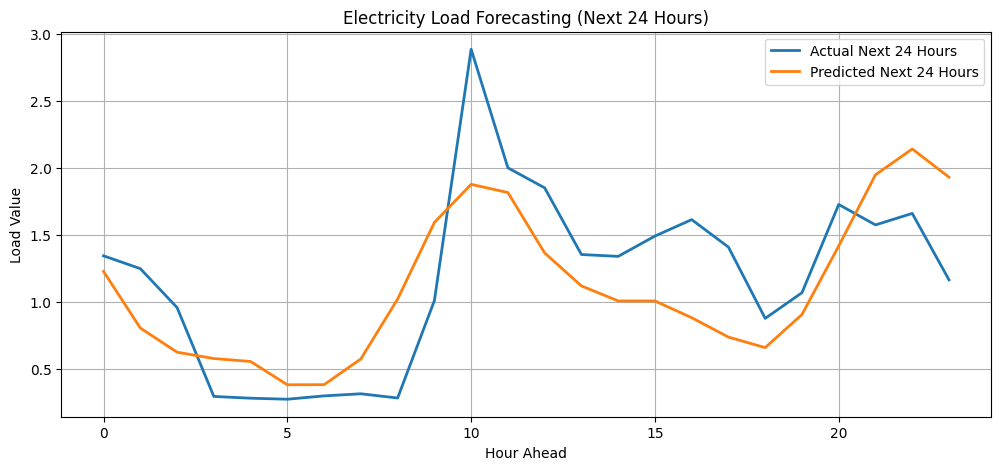

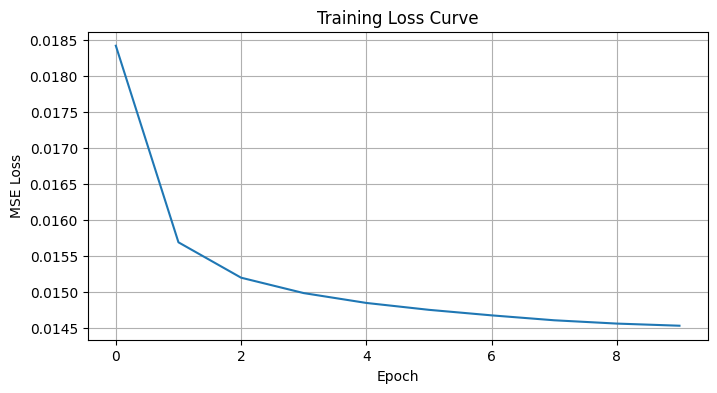

In [ ]:
# ============================================================
#  ELECTRICITY LOAD FORECASTING - NEXT 24 HOURS (LSTM MODEL)
#  AUTO DOWNLOAD DATASET USING KAGGLEHUB
#  COMPLETE END-TO-END CODE IN ONE BLOCK
# ============================================================

!pip install kagglehub numpy pandas matplotlib scikit-learn tensorflow --quiet

import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ------------------------------------------------------------
# 1. DOWNLOAD DATASET FROM KAGGLEHUB
# ------------------------------------------------------------
path = kagglehub.dataset_download("uciml/electric-power-consumption-data-set")
print("Dataset downloaded to:", path)

file_path = path + "/household_power_consumption.txt"

# ------------------------------------------------------------
# 2. LOAD DATASET
# ------------------------------------------------------------
df = pd.read_csv(file_path, sep=';', low_memory=False)
print("\nLoaded dataset sample:")
print(df.head())

# ------------------------------------------------------------
# 3. CLEAN & PREPROCESS
# ------------------------------------------------------------
df['Datetime'] = pd.to_datetime(df['Date'] + " " + df['Time'], errors='coerce')
df = df.dropna(subset=['Datetime'])
df = df.set_index('Datetime')

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df[['Global_active_power']]
df = df.dropna()

# Convert minute data → hourly average
df_hourly = df.resample('H').mean().dropna()

# ------------------------------------------------------------
# 4. NORMALIZE VALUES
# ------------------------------------------------------------
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_hourly)

# ------------------------------------------------------------
# 5. CREATE SEQUENCES
#    past = 24 hours input
#    future = next 24 hours output
# ------------------------------------------------------------
def create_sequences(data, past=24, future=24):
    X, y = [], []
    for i in range(len(data) - past - future):
        X.append(data[i:i+past])
        y.append(data[i+past:i+past+future])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled)

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# ------------------------------------------------------------
# 6. BUILD FAST LSTM MODEL
# ------------------------------------------------------------
model = Sequential([
    LSTM(32, input_shape=(24, 1)),
    Dense(24)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# ------------------------------------------------------------
# 7. TRAIN MODEL
# ------------------------------------------------------------
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# ------------------------------------------------------------
# 8. PREDICT NEXT 24 HOURS (FIXED)
# ------------------------------------------------------------
pred_scaled = model.predict(X_test[-1].reshape(1, 24, 1))
pred = scaler.inverse_transform(pred_scaled)[0]

actual_scaled = y_test[-1]
actual = scaler.inverse_transform(actual_scaled.reshape(1, -1))[0]

# Ensure both are exactly length 24
pred = pred[:24]
actual = actual[:24]

# ------------------------------------------------------------
# 9. CREATE COMPARISON TABLE (FIXED)
# ------------------------------------------------------------
comparison = pd.DataFrame({
    "Hour": np.arange(1, len(actual) + 1),
    "Actual Load": actual,
    "Predicted Load": pred,
    "Difference (Actual - Pred)": actual - pred
})

print("\n===================== 24-HOUR FORECAST =====================")
print(comparison)
print("============================================================")

# ------------------------------------------------------------
# 10. PLOT ACTUAL vs PREDICTED
# ------------------------------------------------------------
plt.figure(figsize=(12,5))
plt.plot(actual, label="Actual Next 24 Hours", linewidth=2)
plt.plot(pred, label="Predicted Next 24 Hours", linewidth=2)
plt.title("Electricity Load Forecasting (Next 24 Hours)")
plt.xlabel("Hour Ahead")
plt.ylabel("Load Value")
plt.grid(True)
plt.legend()
plt.show()

# ------------------------------------------------------------
# 11. PLOT TRAINING LOSS
# ------------------------------------------------------------
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()